# 11_7 범주형 변수의 가변수 처리

In [1]:
# 필요한 패키지 임포트
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [4]:
# 데이터 불러오기
df = pd.read_csv('/Users/adam/Data_Analytics/Python/Datasets/GPU-CPU_benchmark/GPU_CPU_benchmark.csv')

# 데이터 샘플 확인
df.head()

,Device Name,Compute Type,OS,Median Score
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,CPU,Linux,78.570
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,CPU,Windows,297.940
2,2X 12th Gen Intel Core i9-12900KF,CPU,Windows,424.470
3,2X AMD EPYC 7343 16-Core Processor,CPU,Linux,439.210
4,2X AMD Opteron Processor 6276,CPU,Windows,81.478


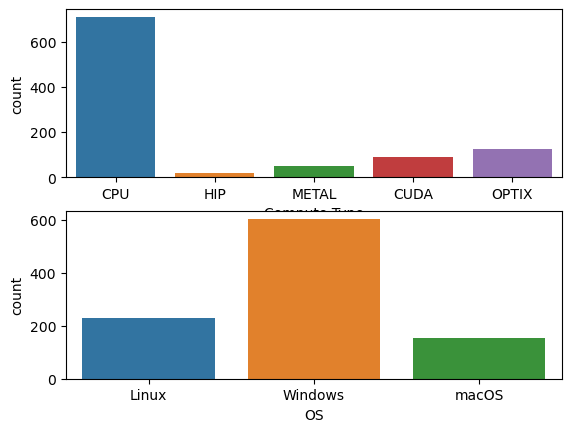

In [10]:
# 변경할 컬럼 범주 별 분포 확인 시각화
fig, ax = plt.subplots(nrows=2)

# Compute Type 컬럼 범주 별 분포
sns.countplot(x='Compute Type', data=df, ax=ax[0])

# OS 컬럼 범주 별 분포
sns.countplot(x='OS', data=df, ax=ax[1])

plt.show()

In [11]:
# 전체 컬럼 일괄 가변수 처리
df1 = pd.get_dummies(df)

df1.head()

,Median Score,Device Name_12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,Device Name_24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,Device Name_2X 12th Gen Intel Core i9-12900KF,Device Name_2X AMD EPYC 7343 16-Core Processor,Device Name_2X AMD Opteron Processor 6276,Device Name_2X AMD Opteron(tm) Processor 6328,Device Name_2X AMD Ryzen Threadripper PRO 3995WX 64-Cores,Device Name_2X Genuine Intel CPU 0000 @ 2.00GHz,Device Name_2X Genuine Intel CPU 0000 @ 2.10GHz,...,Device Name_T500,Device Name_Virtual CPU @ 2.99GHz,Compute Type_CPU,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Linux,OS_Windows,OS_macOS
0,78.570,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,297.940,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,424.470,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,439.210,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,81.478,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
# 특정 컬럼만 가변수 처리
df2 = pd.get_dummies(df, columns = ['Compute Type', 'OS'])
df2.head()

,Device Name,Median Score,Compute Type_CPU,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Linux,OS_Windows,OS_macOS
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,1,0,0,0,0,1,0,0
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,1,0,0,0,0,0,1,0
2,2X 12th Gen Intel Core i9-12900KF,424.470,1,0,0,0,0,0,1,0
3,2X AMD EPYC 7343 16-Core Processor,439.210,1,0,0,0,0,1,0,0
4,2X AMD Opteron Processor 6276,81.478,1,0,0,0,0,0,1,0


In [14]:
# 하나의 가변수 범주 제거 옵션 적용
df3 = pd.get_dummies(df, columns = ['Compute Type', 'OS'], drop_first=True)

df3.head()

,Device Name,Median Score,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,OS_Windows,OS_macOS
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,0,0,0,0,0,0
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,0,0,0,0,1,0
2,2X 12th Gen Intel Core i9-12900KF,424.470,0,0,0,0,1,0
3,2X AMD EPYC 7343 16-Core Processor,439.210,0,0,0,0,0,0
4,2X AMD Opteron Processor 6276,81.478,0,0,0,0,1,0


In [15]:
# 결측값을 별도의 컬럼으로 처리 옵션 적용

df4 = pd.get_dummies(df, columns = ['Compute Type', 'OS'], drop_first=True, dummy_na=True)

df4.head()

,Device Name,Median Score,Compute Type_CUDA,Compute Type_HIP,Compute Type_METAL,Compute Type_OPTIX,Compute Type_nan,OS_Windows,OS_macOS,OS_nan
0,12X Intel Xeon CPU E5-2450 0 @ 2.10GHz,78.570,0,0,0,0,0,0,0,0
1,24X Intel Xeon CPU E5-2690 v3 @ 2.60GHz,297.940,0,0,0,0,0,1,0,0
2,2X 12th Gen Intel Core i9-12900KF,424.470,0,0,0,0,0,1,0,0
3,2X AMD EPYC 7343 16-Core Processor,439.210,0,0,0,0,0,0,0,0
4,2X AMD Opteron Processor 6276,81.478,0,0,0,0,0,1,0,0
